In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import cv2

## Image Processing Approaches

#### Extracting knowledge out of simililarly solved problems 
- ( Road Bump Detection )

- Lane detection ( in order to mask the road and focus on the road bumps ). Bike Trail in our case. Narrowing down the area of interest.

- For detecting road features ahead a combination of Image Processing, Object Detection and Classification could be used for better results.

    - First an object detection model like YOLO or SSD to identify potential bumps in the image. These models are particularly suitable for real-time applications due to their speed.

    - After detecting the road bumps a classification model to classify the type or severity of the bump could be used . This model could be a simpler CNN trained specifically on images of different road conditions.

    - Before passing images into these models, some image processing techniques could be applied to improve model performance. For instance edge detection could be used to highlight the boundaries of road features, or color adjustments to make the bumps more visible.

    - Pooling and similar techniques could be used to reduce the size of the image and improve the speed of the model.
  

### Lane detection example and Hough Transofrm


1. Canny edge detection 

    - Canny edge detection is a multi-step algorithm that can detect edges with noise supression and thin edges
- Gradient: Change in brightness over adjacent pixels

    - Strong gradinet ( black to white : 0 -> 255 )
    - Small gradient ( black to dark gray : 0 -> 20 )
- Applying Gaussian Blur in order to reduce noise and avoid detecting false edges

    - It is optional because Canny Edge Detection will apply Gausian Blur when it is run

- Canny Edge Detection

    - it computes all the gradinet in all directions ( derivativef(x, y))
    - than trace the strongest gradients ( edges )
    - low threshold and high threshold
2. Region of interest

    - Masking the image 
    - Bitwise AND operation ( combining the mask and the image )
    - Where we have 0 in the mask it will "erase" the pixels in the image, making them 0 as well

![image.png](mask.png)

3. Finding Straight lines in a image ( Hough Transform Method )

- will explore more the topic in next points

4. Applying Hough space Transform-

- The image is divided in grid bins

    - for each point in the image we will draw a line in the Hough space
    - in every bin we will count intesections of lines
    - the bin with the most intersections will be the line that we are looking for

-<table><tr><td>![image.png](votes.png)<td>![image.png](votes2.png)<table/>
 

### Hough Transform / Hough Space

- Comparison between a line in the XY space and a point in the Hough Space ( m, b )
    
    - a line with presentation $ y = mx + b $ can be represented as a point in the Parametar Space ( m, b ), m is the slope while b is the y-intercept
    - by plotting the entire family of lines that goes through the point in XY ( each line with its own m and b) The pairs of (m, b) produces an entire line in the Parameter Space
- 

- Point in Image Space -> Line in Parameter Space

- Line in Image Space -> Point in Parameter Space

    - plt two plots showing 

- Comparison of how a line is represented polar and euclidean cordinates 
    - 
- Understanding polar cordinates in hough space 

#### Hough Transform

- Image is divided into cells and we are looking for the lines that pass through each cell
- The bin with the maximum number of votes is the line that we draw as best fit

- We have a problem with vertical lines ( infinite slope ) and we can't represent them in the Hough Space, we have to change the perspective ( polar codinates )




#### Equation for a line in polar coordinates (or Hough Space)

- $ ρ = xcos(θ) + ysin(θ) $ 

    - ρ (rho) is the perpendicular distance from the origin (the point [0, 0]) to the line (closest distance from the origin to the line)
    - θ (theta) is the angle formed by this perpendicular line and the horizontal axis.
    - (x, y) are the coordinates of any point on the line.
    - 
- Remember that (ρ, θ) here define a particular line, not a specific point in space. For every point (x, y) on this line, the equation will hold true. Conversely, you can use (ρ, θ) to generate all points (x, y) that lie on the corresponding line.



### $ \theta $ is changing from 90 to -90 degrees ( $ \pi/2$ rad to $ -\pi/2$ rad ) 
#### Visual prerequisits for understanding the Hough Transform ( how sin and cos are changing with the angle )

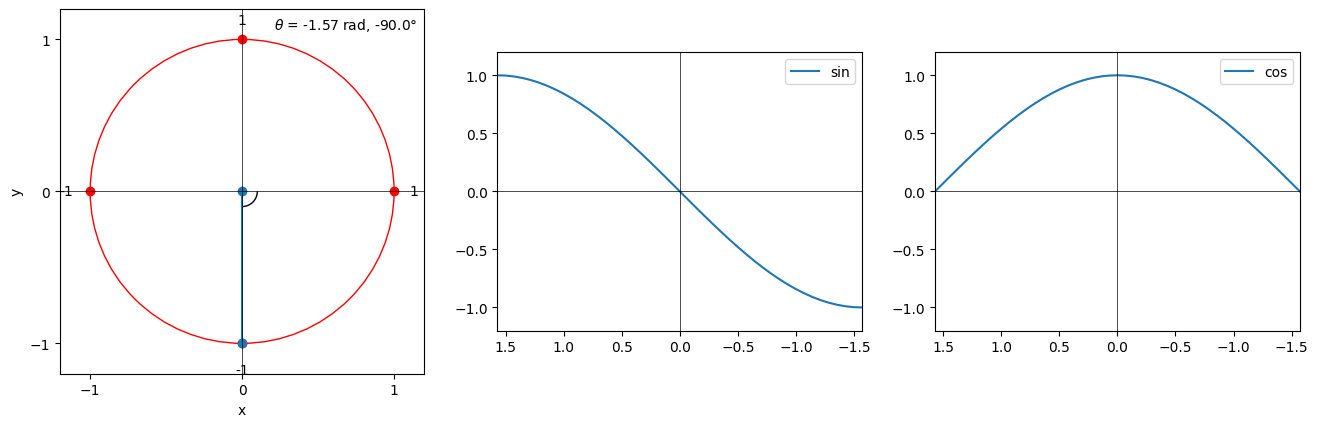

In [1]:

# Convert degrees to radians
start = np.pi / 2
end = - np.pi / 2

# Create figure and axes
fig, ax = plt.subplots(1, 3, figsize=(16, 6))

# Create a unit circle
circle = plt.Circle((0, 0), 1, color='r', fill=False)
ax[0].add_artist(circle)

# Create variables for the line on the circle
circle_line, = ax[0].plot([], [], 'o-')
ax[0].set_xlim(-1.2, 1.2)
ax[0].set_ylim(-1.2, 1.2)
ax[0].set_aspect('equal')  # Ensure equal scaling

# Add x and y axes to the plot
ax[0].axhline(0, color='black',linewidth=0.5)
ax[0].axvline(0, color='black',linewidth=0.5)

# Label axes and add ticks
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_xticks([-1, 0, 1])
ax[0].set_yticks([-1, 0, 1])
# Add the points
ax[0].scatter([0, 0, -1, 1], [-1, 1, 0, 0], color='red')
ax[0].text(1.1, 0, '1', verticalalignment='center')
ax[0].text(-1.2, 0, '-1', verticalalignment='center')
ax[0].text(0, 1.1, '1', horizontalalignment='center')
ax[0].text(0, -1.2, '-1', horizontalalignment='center')


# Create variables for the sine and cosine lines
sin_line, = ax[1].plot([], [], label="sin")
cos_line, = ax[2].plot([], [], label="cos")
for i in range(1, 3):
    ax[i].set_xlim(start, end)
    ax[i].set_ylim(-1.2, 1.2)
    ax[i].legend()
    ax[i].set_aspect('equal')  # Ensure equal scaling

    # Add x and y axes to the plot
    ax[i].axhline(0, color='black',linewidth=0.5)
    ax[i].axvline(0, color='black',linewidth=0.5)

# Initialization function
def init():
    circle_line.set_data([], [])
    sin_line.set_data([], [])
    cos_line.set_data([], [])
    return circle_line, sin_line, cos_line

# Animation update function
from matplotlib.patches import Arc

# Animation update function
def update(frame):
    x = np.cos(frame)
    y = np.sin(frame)
    circle_line.set_data([0, x], [0, y])

    # Remove the previous angle annotation and arc

    # In general, hasattr is a useful function for checking if an object has a certain property
    # or method before attempting to access or use it. This can help prevent errors in your code
    # when dealing with objects that might not have a certain attribute.

    if hasattr(update, 'angle_annotation'):
        update.angle_annotation.remove()
    if hasattr(update, 'angle_arc'):
        update.angle_arc.remove()

    # Create a new angle annotation
    update.angle_annotation = ax[0].annotate(r'$\theta$ = {:.2f} rad, {:.1f}°'.format(frame, np.rad2deg(frame)), 
                                             xy=(1, 1), xycoords='axes fraction',
                                             xytext=(-5, -5), textcoords='offset points',
                                             horizontalalignment='right', verticalalignment='top')

    # Create a new angle arc based on whether y is positive or negative
    if y >= 0:
        angle_arc = Arc((0,0), 0.2, 0.2, theta1=0, theta2=np.rad2deg(frame))
    else:
        angle_arc = Arc((0,0), 0.2, 0.2, theta1=np.rad2deg(frame), theta2=0)
    update.angle_arc = ax[0].add_patch(angle_arc)

    sin_line.set_data(np.append(sin_line.get_xdata(), frame), np.append(sin_line.get_ydata(), y))
    cos_line.set_data(np.append(cos_line.get_xdata(), frame), np.append(cos_line.get_ydata(), x))
    return circle_line, sin_line, cos_line, update.angle_arc

# Create animation
ani = FuncAnimation(fig, update, frames=np.linspace(start, end, 45), init_func=init, blit=True)

# Convert animation to HTML5 video
# HTML(ani.to_html5_video())

# Save the animation
ani.save('animation1.gif', writer='pillow')
plt.show()


![animation.gif](animation1.gif)

#### Line equation in polar coordinates
- Tackling the problem of vertical lines ( infinite slope ) by changing the perspective ( polar codinates )

- $ \rho = xcos(\theta) + ysin(\theta) $
- again two parmeters ( $ \rho $ and $ \theta $ ) but now we can represent vertical lines as well
- $\theta$ from ( $ \pi/2$ rad to $ -\pi/2$ rad ) 

- Let's try to visualize how a rectangle ABCD with center E is visualized both in xy-coordinates and in polar coordinates ( hough space )
    - matching color between both plots is used to show the relation between the two ( how a point in xy-coordinates is represented as a sinusoid in polar coordinates )
    - intersection of the sinusoids marks the lines in xy-coordinates that pass through the respective point
    - Example: Sinosoids of points E, A and C intersect in a point which in xy-coordinates is the line that passes through points A, E and C ( diagonal of the rectangle )

    - The reason we see multiple points at the intersections in the Hough space is due to the resolution of theta and rho. In this case, theta values are discretized into 360 bins (one for each degree), and rho values are calculated at each of these discrete theta values for each line. Therefore, when two lines intersect, they do so over a small range of theta values due to this discretization, which appears as multiple points on the plot. This is essentially a manifestation of the inherent imprecision when representing continuous values (like angles and distances) in a discrete manner.

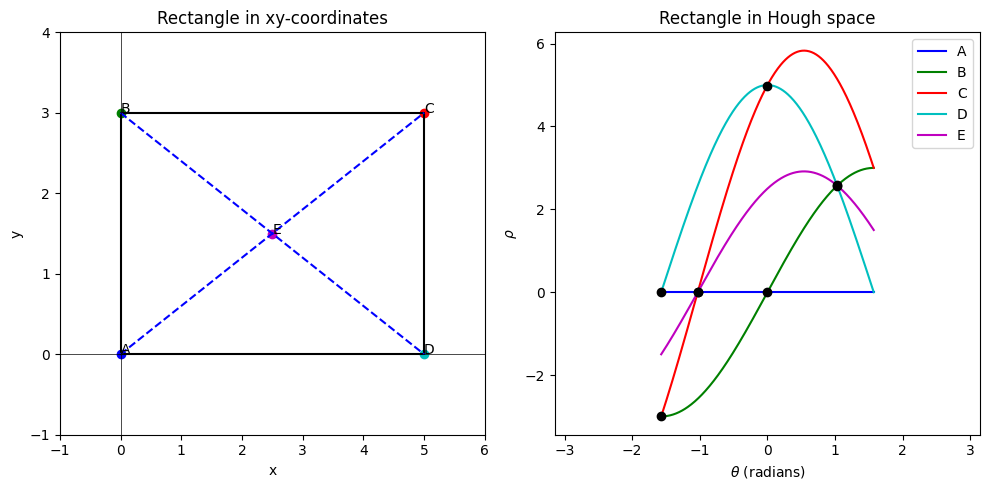

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define rectangle parameters
M = 3
N = 5

center = [N/2, M/2]

# Define rectangle points in xy-coordinates (A, B, C, D, E)
points = [[0, 0], [0, M], [N, M], [N, 0], center]
labels = ['A', 'B', 'C', 'D', 'E']
colors = ['b', 'g', 'r', 'c', 'm']

# Define theta values
theta = np.linspace(-np.pi/2, np.pi/2, 360)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

rho_values = []

# Iterate over points on the rectangle's edges and center
for i, point in enumerate(points):
    x, y = point

    # Compute rho for each theta value
    rho = x*np.cos(theta) + y*np.sin(theta)
    rho_values.append(rho)
    
    # Plot in xy-coordinates
    ax[0].scatter(*point, color=colors[i])
    ax[0].text(x, y, labels[i])  # label the points

    # Plot in Hough space (rho, theta)
    ax[1].plot(theta, rho, color=colors[i], label=labels[i])

# Connect the points to form the rectangle
ax[0].plot([points[i][0] for i in [0, 1, 2, 3, 0]], [points[i][1] for i in [0, 1, 2, 3, 0]], 'k')

ax[0].plot([0, N], [0, M], 'b--')  # add diagonal
ax[0].plot([0, N], [M, 0], 'b--')  # add diagonal
# Add x and y axes to the plot
ax[0].axhline(0, color='black',linewidth=0.5)
ax[0].axvline(0, color='black',linewidth=0.5)

# Set labels and title for xy-coordinates plot
ax[0].set_xlim(-1, N+1)
ax[0].set_ylim(-1, M+1)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[0].set_title('Rectangle in xy-coordinates')

# Set labels and title for Hough space plot, and add a legend
ax[1].set_xlim(-np.pi, np.pi)
ax[1].set_xlabel(r'$\theta$ (radians)')
ax[1].set_ylabel(r'$\rho$')
ax[1].set_title('Rectangle in Hough space')
ax[1].legend()

# Find and plot intersections in Hough space
intersection_points = []  # list to store the already plotted points
for i in range(len(rho_values)):
    for j in range(i+1, len(rho_values)):
        idx = np.where(np.isclose(rho_values[i], rho_values[j], atol=0.015))[0]
        if len(idx) > 0:
            intersection_point = (theta[idx[0]], rho_values[i][idx[0]])
            if intersection_point not in intersection_points:
                ax[1].plot(*intersection_point, 'ko')
                intersection_points.append(intersection_point)

plt.tight_layout()
plt.show()


### Creating a function that displays points form xy-coordinates to sinosoids in Hough space
- Example of 4 points on a line in xy-coordinates and how they are represented in Hough space
- Example for image space ( bins)

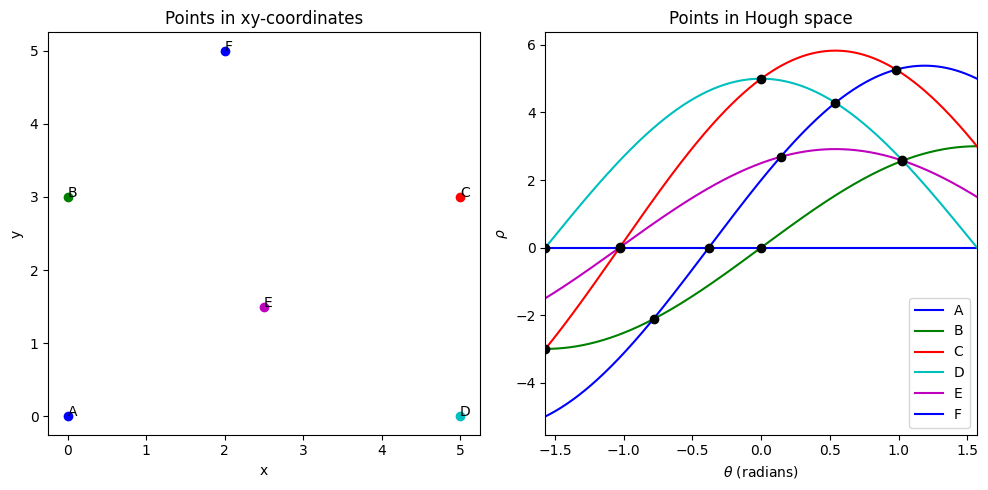

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_uppercase

def plot_hough_transform(points):
    num_points = len(points)
    labels = list(ascii_uppercase)[:num_points]  # Generate labels
    colors = ['b', 'g', 'r', 'c', 'm'] * num_points  # Repeating color list

    # Define theta values
    theta = np.linspace(-np.pi/2, np.pi/2, 360)

    fig, ax = plt.subplots(1, 2, figsize=(10, 5))

    rho_values = []

    # Iterate over points 
    for i, point in enumerate(points):
        x, y = point

        # Compute rho for each theta value
        rho = x*np.cos(theta) + y*np.sin(theta)
        rho_values.append(rho)
        
        # Plot in xy-coordinates
        ax[0].scatter(*point, color=colors[i])
        ax[0].text(x, y, labels[i])  # label the points

        # Plot in Hough space (rho, theta)
        ax[1].plot(theta, rho, color=colors[i], label=labels[i])

    # Set labels and title for xy-coordinates plot
    ax[0].set_xlabel('x')
    ax[0].set_ylabel('y')
    ax[0].set_title('Points in xy-coordinates')

    # Set labels and title for Hough space plot, and add a legend
    ax[1].set_xlim(-np.pi/2, np.pi/2)
    ax[1].set_xlabel(r'$\theta$ (radians)')
    ax[1].set_ylabel(r'$\rho$')
    ax[1].set_title('Points in Hough space')
    ax[1].legend()

    # Find and plot intersections in Hough space
    intersection_points = []  # list to store the already plotted points
    for i in range(len(rho_values)):
        for j in range(i+1, len(rho_values)):
            idx = np.where(np.isclose(rho_values[i], rho_values[j], atol=0.015))[0]
            if len(idx) > 0:
                intersection_point = (theta[idx[0]], rho_values[i][idx[0]])
                if intersection_point not in intersection_points:
                    ax[1].plot(*intersection_point, 'ko')
                    intersection_points.append(intersection_point)

    plt.tight_layout()
    plt.show()

points = [[0, 0], [0, 3], [5, 3], [5, 0], [2.5, 1.5], [2, 5]]  # example of points
plot_hough_transform(points)


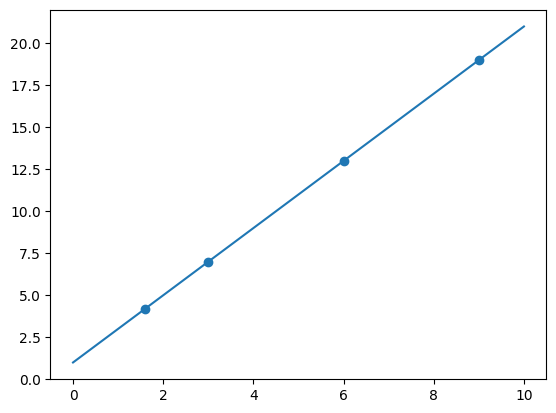

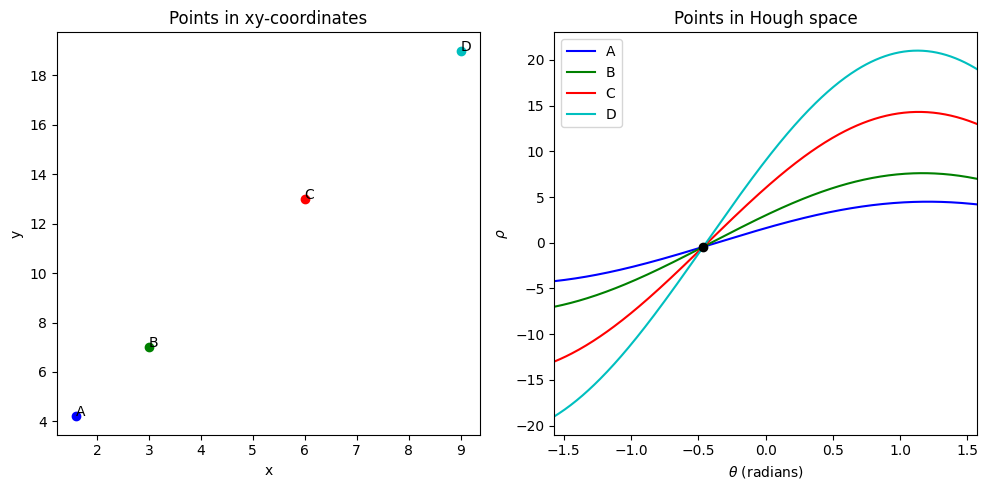

In [4]:
# Line in xy-coordinates
x = np.linspace(0, 10, 100)
# Line equation: y = mx + c
m = 2  # slope
c = 1  # y-intercept
y = m * x + c
plt.plot(x, y)
X = np.array([1.6, 3, 6, 9])
Y = m * X + c
plt.scatter(X, Y)
plot_hough_transform(list(zip(X, Y)))

### Lane detection example implementation

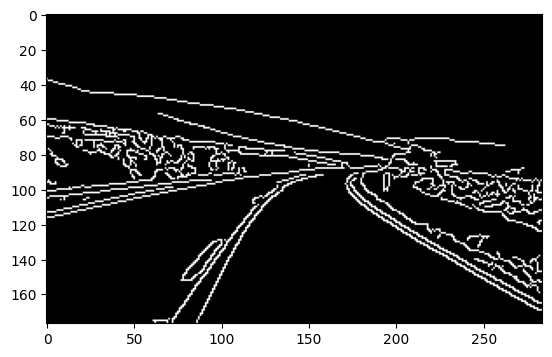

In [7]:

image = cv2.imread('lane1.png')
lane_image = np.copy(image)
gray_image = cv2.cvtColor(lane_image, cv2.COLOR_RGB2GRAY)
blured_image = cv2.GaussianBlur(gray_image, (5,5), 0)
canny_image = cv2.Canny(blured_image, 50, 150)

plt.imshow(canny_image, cmap='gray')


In [8]:
def canny(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blured_image = cv2.GaussianBlur(gray_image, (5,5), 0)
    canny_image = cv2.Canny(blured_image, 50, 150)
    return canny_image
canny_image = canny(lane_image)

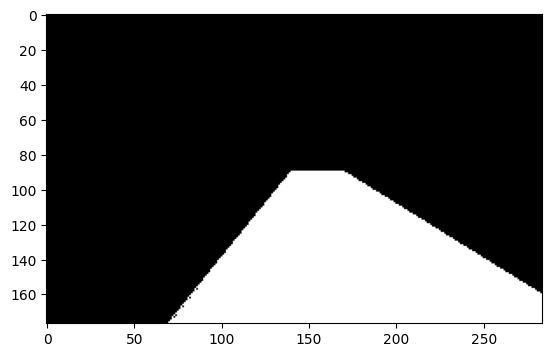

In [9]:
# Setting an area of interest (tracing a polygon ABCD) a mask
# A(75, maxy), B(max(x), maxy), C(170, 90), D(140, 90)
region1 = np.array([[(70, image.shape[0]), (image.shape[1], image.shape[0]), (image.shape[1], 160), (170, 90), (140, 90)]])

def region_of_interest(image, region):
    height = image.shape[0]
    mask = np.zeros_like(image) # mask with black pixels matching the dimensions of the image
    cv2.fillPoly(mask, region, 255) # fill the triangle with white pixels
    return mask

region_of_interest(canny_image, region1)
plt.imshow(region_of_interest(canny_image, region1), cmap='gray')

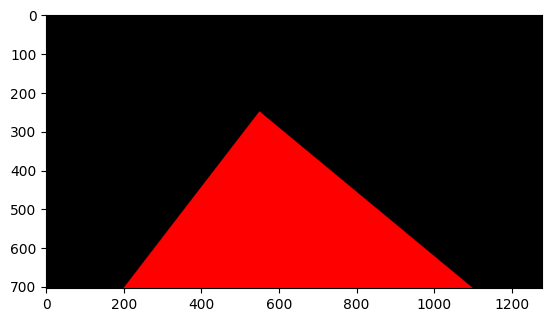

In [10]:
# Testing other mask shapes
image2 = cv2.imread('test_image.png')
lane_image2 = np.copy(image2)
region = np.array([[(200, lane_image2.shape[0]), (1100, lane_image2.shape[0]), (550, 250)]])
plt.imshow(region_of_interest(lane_image2, region))

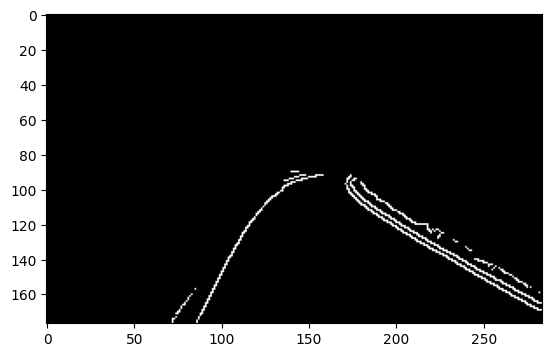

In [11]:
masked_image = cv2.bitwise_and(canny_image, region_of_interest(canny_image, region1))
plt.imshow(masked_image, cmap='gray')

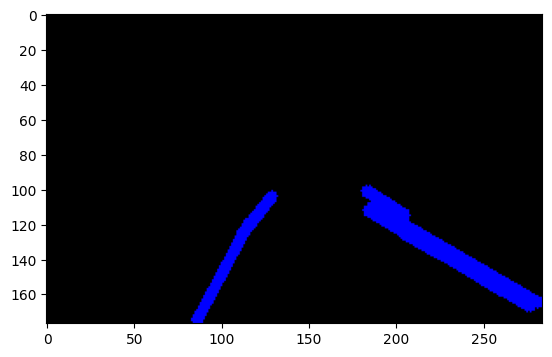

In [12]:
# Important - the resolution of the bins
# Threshold - minimum number of intersections in a bin to be considered a line

lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 50, np.array([]), minLineLength=20, maxLineGap=2) 

def display_lines(image, lines, weight):
    line_image = np.zeros_like(image)
    if lines is not None and len(lines) > 0:
        for line in lines:
            if line is not None:
                x1, y1, x2, y2 = line.reshape(4)
                cv2.line(line_image, (x1,y1), (x2,y2), (0,0,255), weight)
    return line_image
plt.imshow(display_lines(lane_image, lines,5))

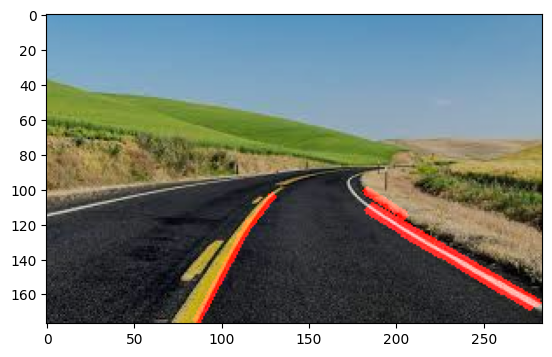

In [13]:
line_image = display_lines(lane_image, lines, 4)
combo_image = cv2.addWeighted(lane_image, 0.8, line_image, 1, 1) # Alpha/Beta will multiply all pixel values by 0.8 of the original image
plt.imshow(cv2.cvtColor(combo_image, cv2.COLOR_RGB2BGR) )

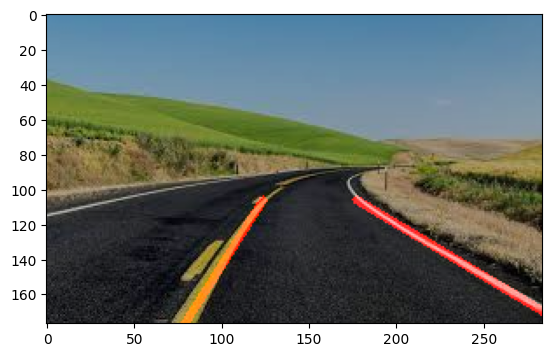

In [14]:
# Optimizing the lines 

def average_slope_intercept(lane_image, lines):
    left_fit = []
    right_fit = []
    for line in lines:
        x1, y1, x2, y2 =  line.reshape(4)

        # We are going to use polyfit to find the slope and intercept of the lines ( fitting a polynomial of degree 1 )
        # polyfit will return the slope and intercept of every line
        
        parameters = np.polyfit((x1, x2), (y1, y2), 1)
        slope = parameters[0]
        intercept = parameters[1]
        # The slope of the left lane_line is negative and the slope of the right lane_line is positive 
        # ( Left: x increases - y decreases, Right: x increases - y increases )
        if slope < 0:
            left_fit.append((slope, intercept))
        else:
            right_fit.append((slope, intercept))
        
    # Available slopes and intercepts for the left and right lane_lines
    left_line = None
    right_line = None
    
    if left_fit:
        left_fit_average = np.average(left_fit, axis=0)
        left_line = make_coordinates(lane_image, left_fit_average)
        
    if right_fit:
        right_fit_average = np.average(right_fit, axis=0)
        right_line = make_coordinates(lane_image, right_fit_average)
    
    return np.array([left_line, right_line])

def make_coordinates(image, line_parameters):
    slope, intercept = line_parameters

    # Check if slope is non-zero to avoid division by zero
    if slope != 0:
        y1 = image.shape[0] # bottom of the image
        y2 = int(y1*(3/5)) # slightly lower than the middle
        x1 = int((y1 - intercept)/slope) # x = (y - b)/m
        x2 = int((y2 - intercept)/slope) # x = (y - b)/m
        return np.array([x1, y1, x2, y2])
    
    # Handle the case when slope is zero (vertical line)
    else:
        x = int(intercept) # x-coordinate of the vertical line
        return np.array([x, 0, x, image.shape[0]])


averaged_lines = average_slope_intercept(lane_image, lines)
line_image = display_lines(lane_image, averaged_lines,4)
combo_image = cv2.addWeighted(lane_image, 0.7, line_image, 1, 1)
plt.imshow(cv2.cvtColor(combo_image, cv2.COLOR_RGB2BGR) )


### Lets combine all lane detection steps in one function in order to apply it easily to a video

- Extracting some useful parameters to be input as arguments for different images
- 1. Load the image/video frames
- 2. Image Preprocessing - before canny ednge detection
    - Filters - helping to identify and highlight the edges of the road/trail/lanes
- 3. Region of interest ( Masking ) 
    - in later stages could be deveoped as dynamic region of interest ( calculating on every frame )
- 4. Hough Transform 
    - usefull parameters: threshold, min_line_length, max_line_gap
- 5. Draw lines on the image 
    - level/length of the avareged lines
    - alpha/beta of combined image
    


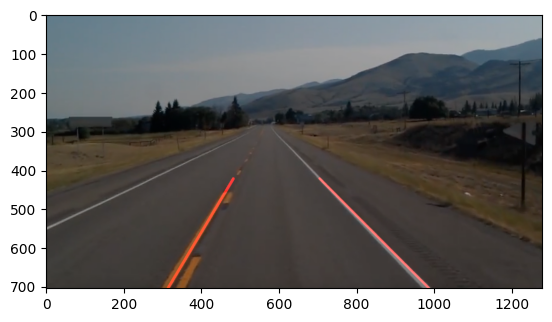

In [ ]:
image1 = cv2.imread('test_image.png')
region = np.array([[(200, image1.shape[0]), (1100, image1.shape[0]), (550, 250)]])

def lane_detection(image):
    
    lane_image = np.copy(image)
    canny_image = canny(lane_image)
    masked_image = cv2.bitwise_and(canny_image, region_of_interest(canny_image, region))
    lines = cv2.HoughLinesP(masked_image, 2, np.pi/180, 50, np.array([]), minLineLength=20, maxLineGap=2) 
    line_image = display_lines(lane_image, lines, 5)
    averaged_lines = average_slope_intercept(lane_image, lines)
    line_image = display_lines(lane_image, averaged_lines, 5)
    combo_image = cv2.addWeighted(lane_image, 0.7, line_image, 1, 1)
    return combo_image

plt.imshow(cv2.cvtColor(lane_detection(image1), cv2.COLOR_RGB2BGR) )

### Applying the lane detection to a video

In [ ]:

cap = cv2.VideoCapture('test2.mp4')

# Get the frame width and height from the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
output_video = cv2.VideoWriter('output1.mp4',cv2.VideoWriter_fourcc(*'mp4v') , 30, (frame_width, frame_height))

while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break

    # Process the frame (lane detection)
    lane_image = lane_detection(frame)

    # Write the processed frame to the output video file
    output_video.write(lane_image)

    # Display the processed frame (uncomment if you want to display the video while processing)

    # cv2.imshow('result', lane_image)
    # if cv2.waitKey(1) & 0xFF == ord('q'):
    #     break

# Release the video capture and video writer objects
cap.release()
output_video.release()

# Close all windows
cv2.destroyAllWindows()


C:\Users\dimit\AppData\Local\Temp\ipykernel_30868\725361484.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([left_line, right_line])


#### Image preprocessing for Trail Environment
- Helping canny edge detection to detect the edges of the trail
- 

In [ ]:
image = cv2.imread('test1.png')

# Apply color filtering
green_lower = np.array([0, 100, 0], dtype="uint8")
green_upper = np.array([100, 255, 100], dtype="uint8")
mask = cv2.inRange(image, green_lower, green_upper)
filtered = cv2.bitwise_and(image, image, mask=mask)

# Apply noise reduction using Gaussian blur
blurred = cv2.GaussianBlur(filtered, (5, 5), 0)
# Split the image into individual channels
b, g, r = cv2.split(blurred)
# Apply histogram equalization to each channel
eq_b = cv2.equalizeHist(b)
eq_g = cv2.equalizeHist(g)
eq_r = cv2.equalizeHist(r)

# Merge the equalized channels back into an image
equalized = cv2.merge((eq_b, eq_g, eq_r))

# Convert the equalized image to grayscale
gray = cv2.cvtColor(equalized, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150)

# Display the processed image
cv2.imshow("Processed Image", edges)
cv2.waitKey(0)
cv2.destroyAllWindows()


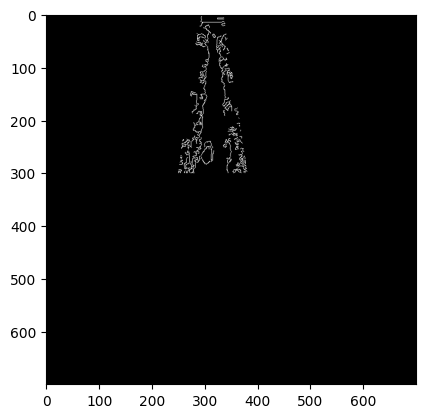

In [ ]:
image1 = cv2.imread('test1.png')
image1 = cv2.resize(image1, (700, 700))
image1.shape
plt.imshow(image1, cmap='gray')
region = np.array([[(250, 300), (380, 300), (335, 0), (290, 0)]])
lane_image = np.copy(image1)
canny_image = canny(lane_image)
masked_image = cv2.bitwise_and(canny_image, region_of_interest(canny_image, region))
plt.imshow(masked_image, cmap='gray')


C:\Users\dimit\AppData\Local\Temp\ipykernel_30868\725361484.py:34: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([left_line, right_line])


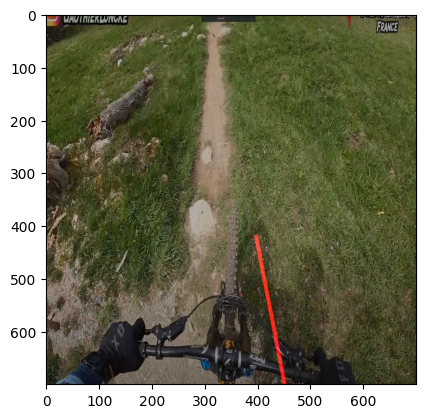

In [ ]:
region = np.array([[(250, 300), (380, 300), (335, 0), (290, 0)]])
lane_detection(image1)
plt.imshow(cv2.cvtColor(lane_detection(image1), cv2.COLOR_RGB2BGR) )

### Enlightenment

- For Jump Detection we could use the same approach as for Lane Detection but detecting the distinct horizontal line that marks the edge of the jump kicker. It could be augmented for accuracy with action recognition model ( agent with velocity ( **the edge of the jump approaching the rider** ))

![image.png](edge1.jpg)

### Resize all collected images to 700x700 pixels

In [ ]:
from PIL import Image
import os

# Set the directory you want to start from

rootDir = r'C:\WORK\BI\LEARN\SU\Mathematical-Concepts-for-Developers\PROJECT\train'
for dirName, subdirList, fileList in os.walk(rootDir):
    print('Found directory: %s' % dirName)
    for fname in fileList:
        if fname.endswith('.jpg'):
            print('\t%s' % fname)
            img = Image.open(os.path.join(dirName, fname))
            resized_img = img.resize((700, 700))
            resized_img.save(os.path.join(dirName, 'resized_' + fname))


Found directory: C:\WORK\BI\LEARN\SU\Mathematical-Concepts-for-Developers\PROJECT\train
	2023-06-07 10_18_35-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_20_33-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_21_07-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_22_07-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_23_01-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_23_35-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_24_32-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 10_25_12-(189) DARKFEST 2023 IS BACK AND EVEN BIGGER THEN EVER!!! - YouTube.jpg
	2023-06-07 20_01_22-(190) POV _ THE BEST MTB JUMP LINE_! - YouTube.jpg
	2023-06-07 20_01_52-(190) POV _ THE BEST MTB JUMP LINE_! - YouTube.jpg
	2023-06-07 20_02_26-(190) POV _